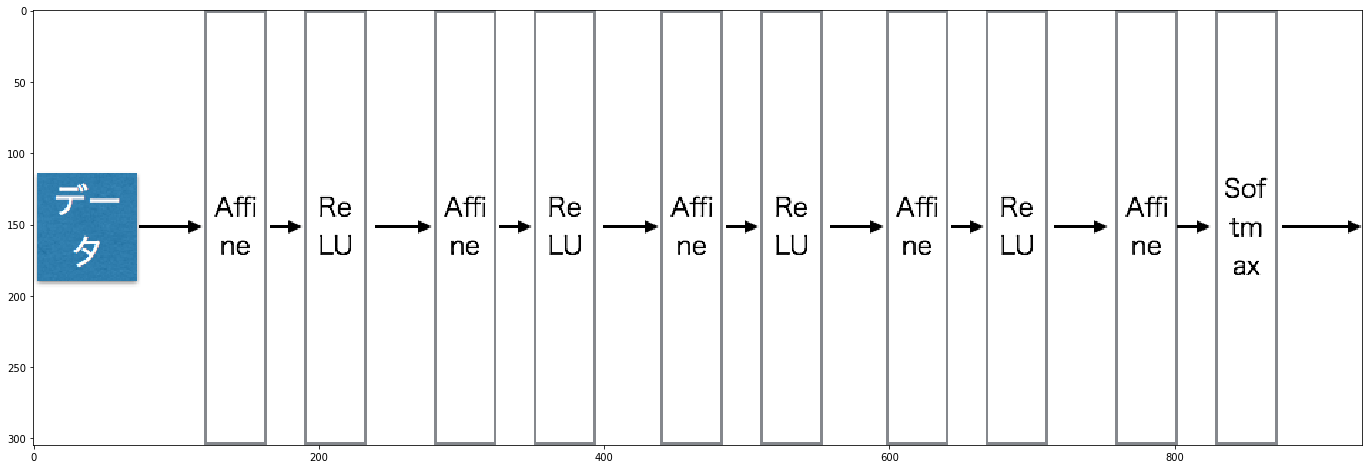

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork001.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

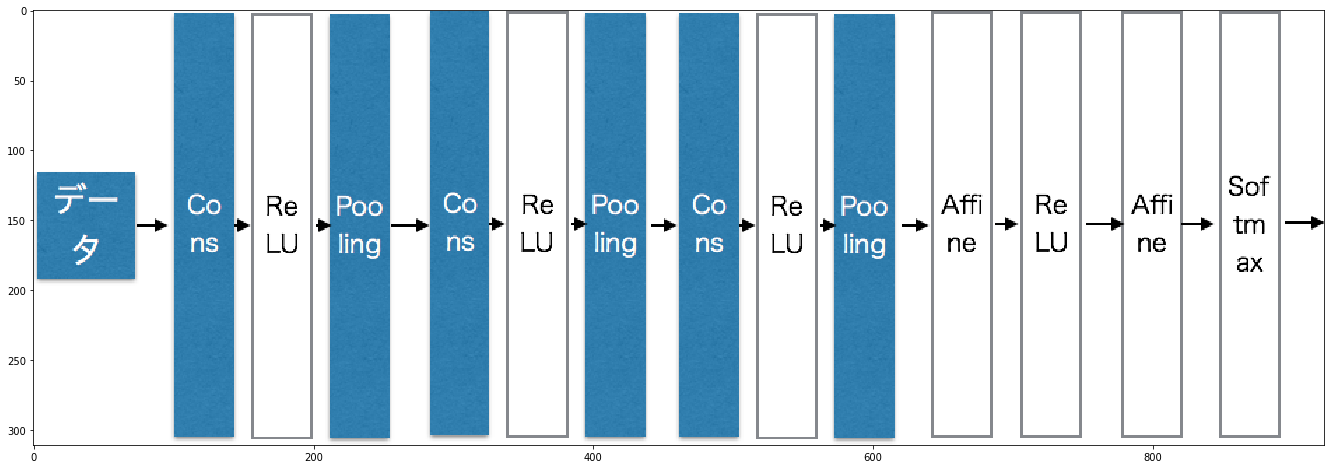

In [4]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork002.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

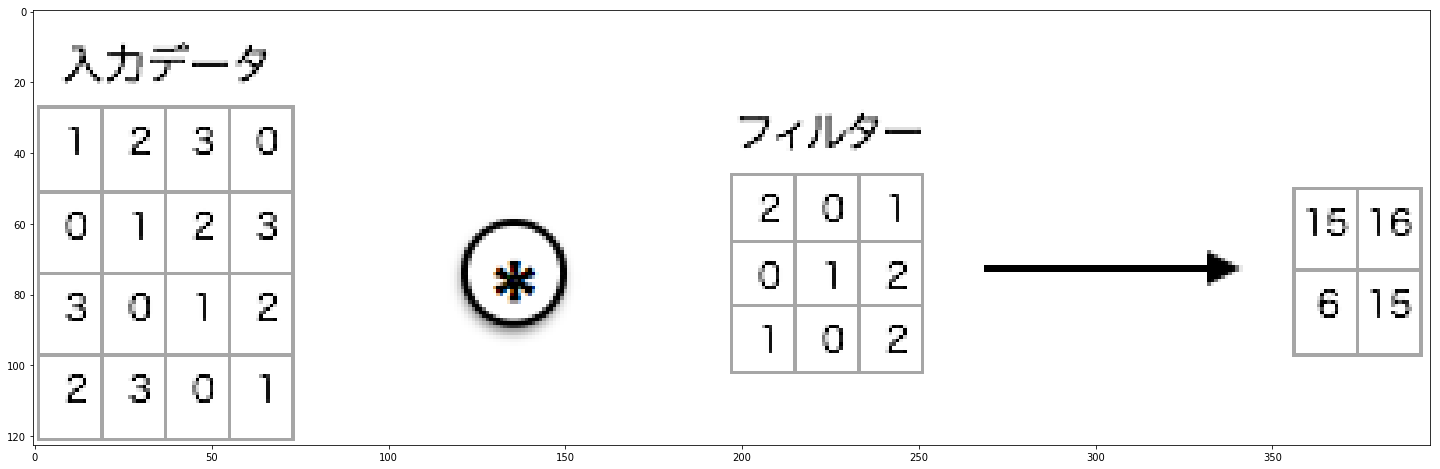

In [5]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork003.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

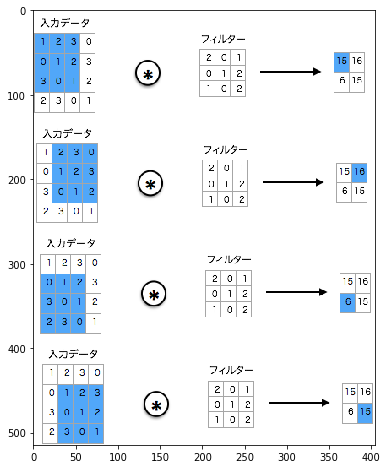

In [6]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork004.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

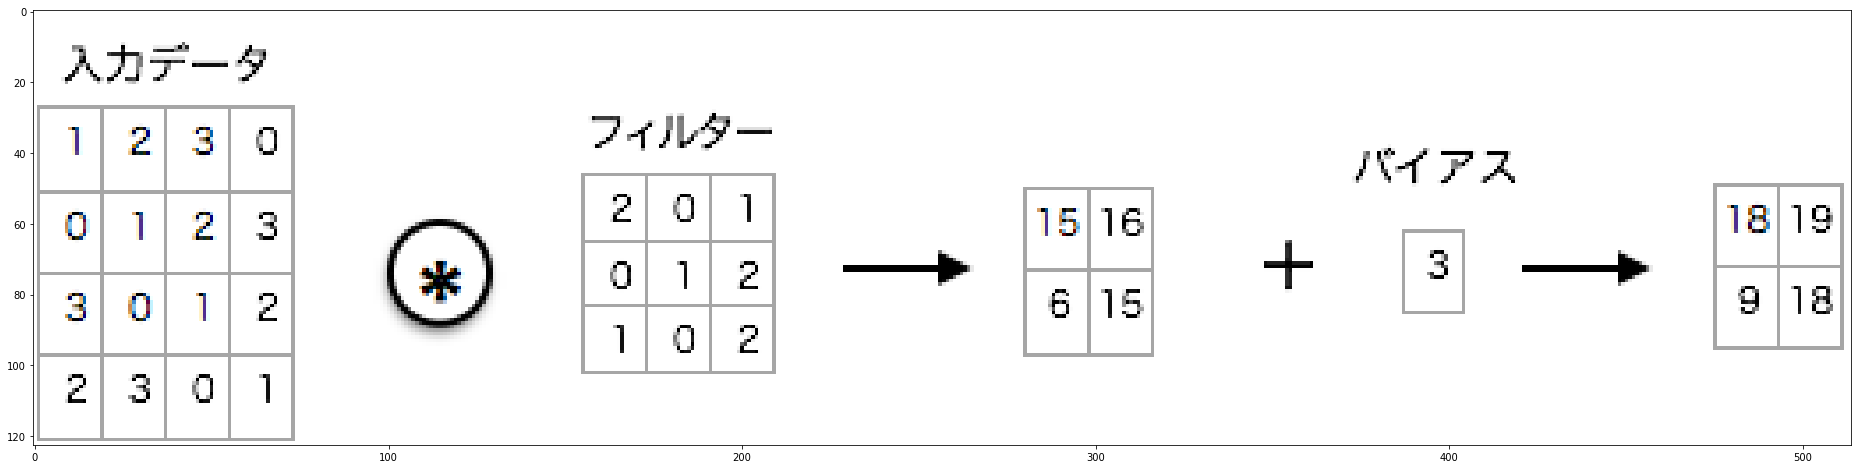

In [7]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork005.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

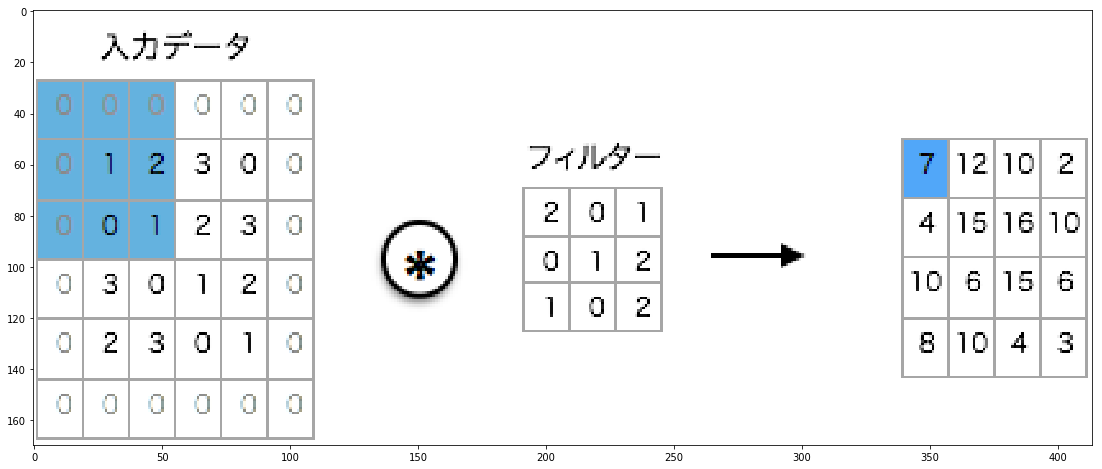

In [8]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork006.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

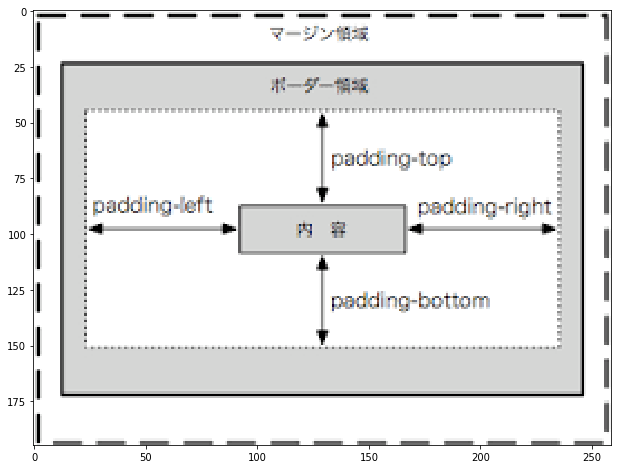

In [9]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork007.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

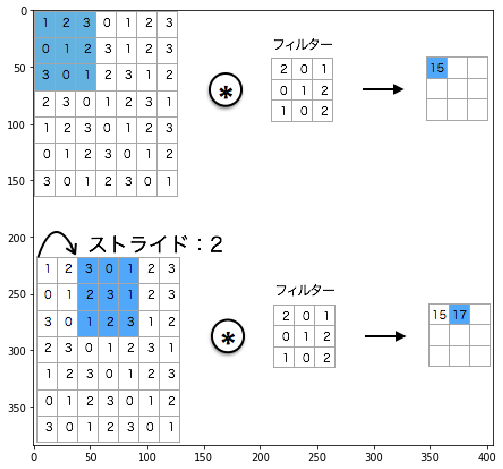

In [10]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork008.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

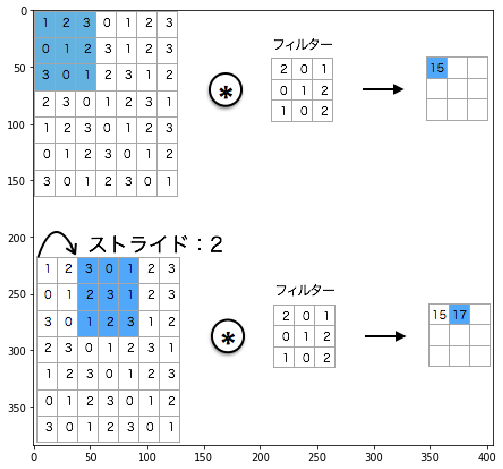

In [11]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork009.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

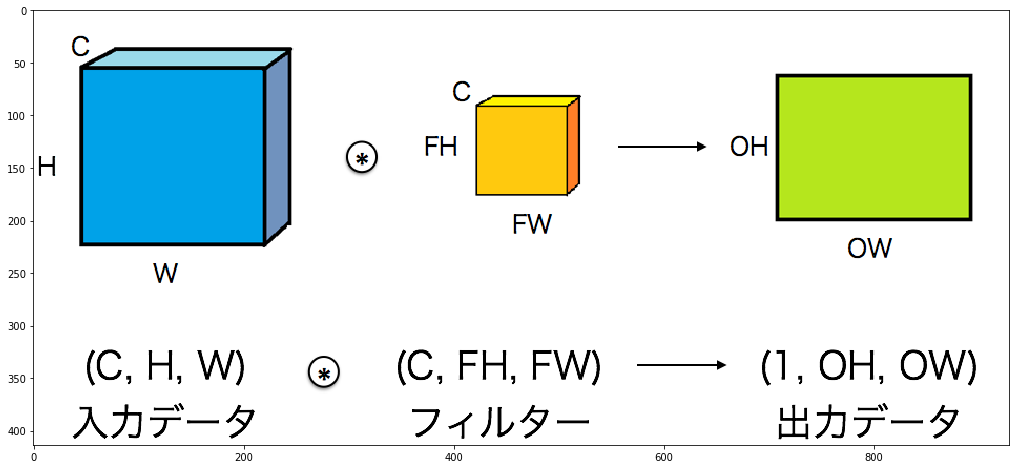

In [12]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork010.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

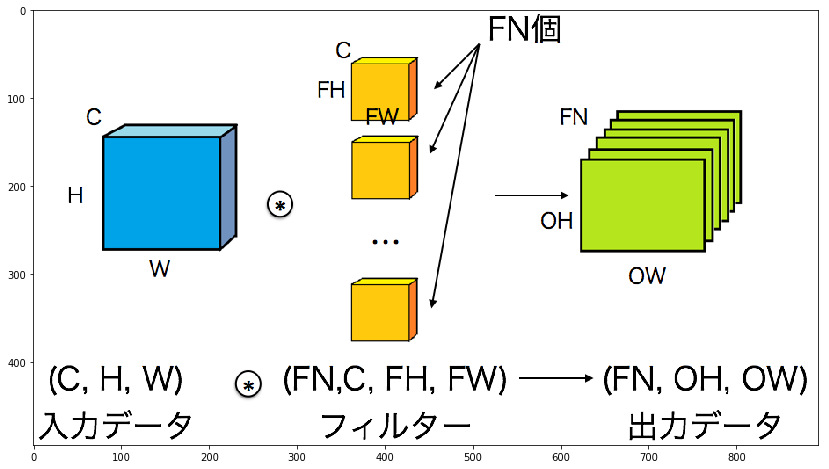

In [13]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork011.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

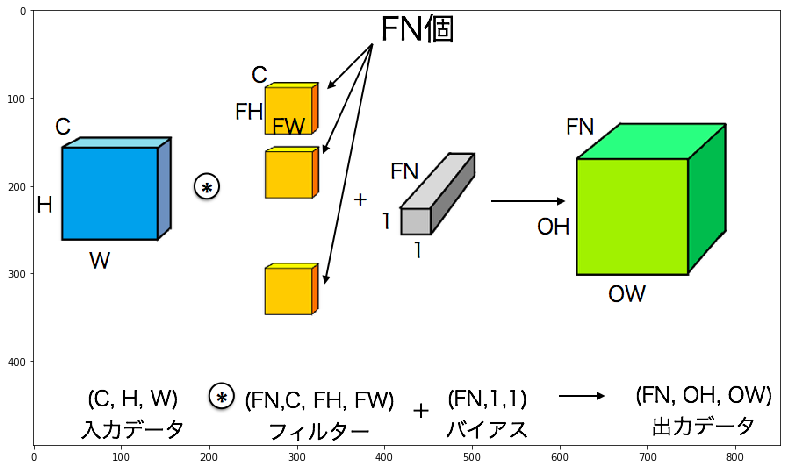

In [15]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork012.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

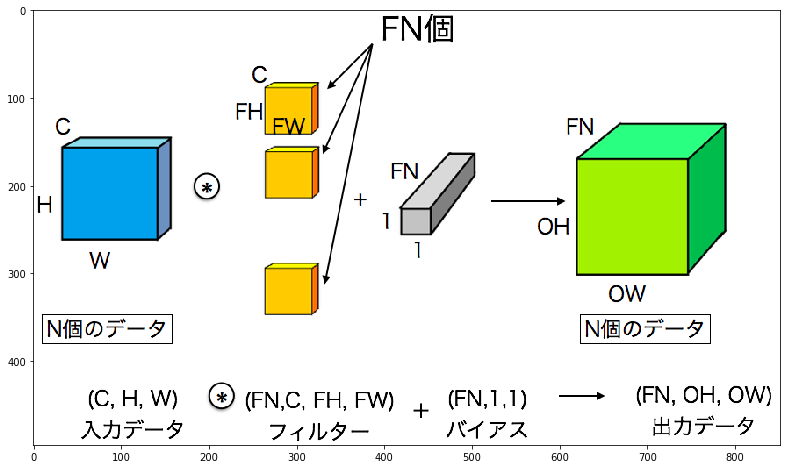

In [16]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork013.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

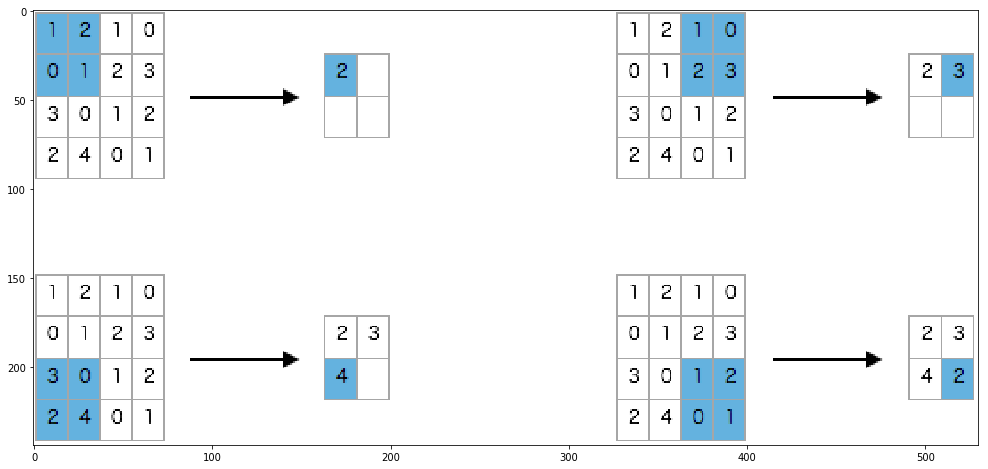

In [17]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork014.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

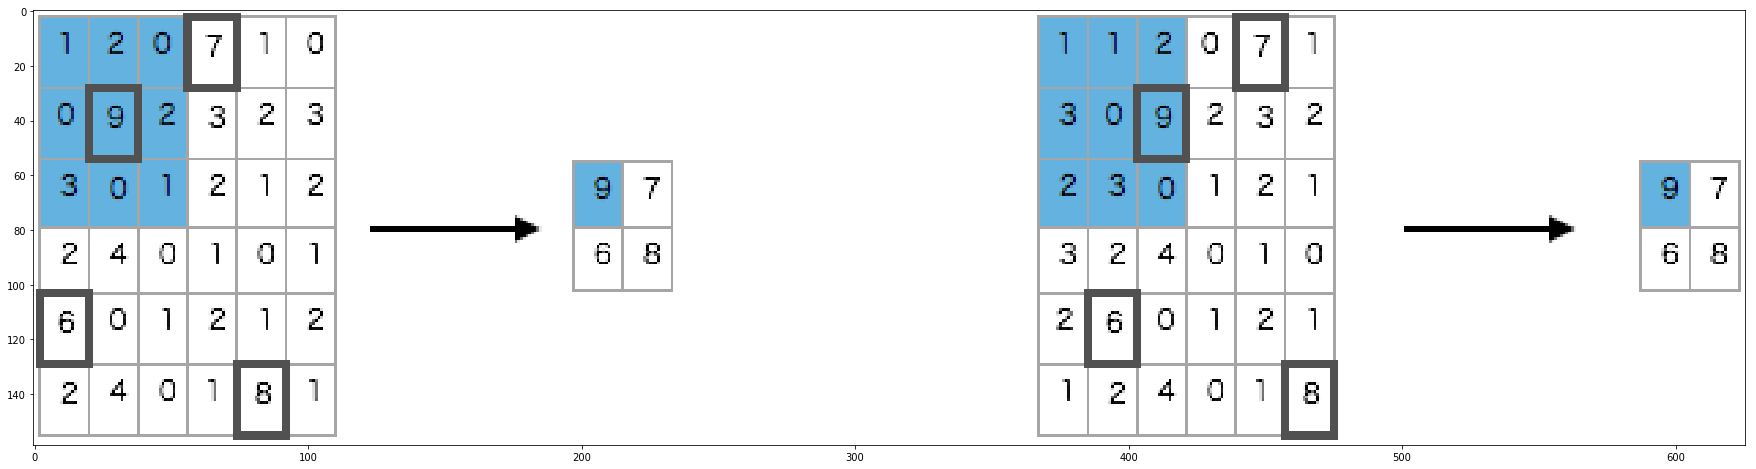

In [18]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork015.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [1]:
#全結合層。これまでのニューラルネットワークは全部結合していた。Dropoutは？ってつっこみはさておき。
#今回行うのはCNN。畳み込みニューラルネットワーク。
#前回は立体を一面に落としていた。え？写真でしょ？って思うだろうけれど、実質（1,28,28）の画像を784という数字に直した。

#通常考えれば何でも立体であるわけでして、そこに特徴があるわけじゃん。
#で、その大きいスコアを取り出そうってのが大まかな考えなわけだし。
#で、Convolutionは何を行うのかというと、例えばさっきの28ｘ28ならそれが用意され、そこの特徴点を
#フィルターを通して計算される。そこにバイアスを足して出力データとして、ReLU関数層に移動する。

#全結合層と違ってこっちは割かしラフで入力データの周囲に0でパディング（詰める）する。
#これは都合だ。出力が1になってしまった時、もう次の計算が出来ないから。
#フィルターは上記のように計算したら次の位置に移動する。これをstride(歩)という。

#3次元データなんだから縦横奥の3方向あるわけでして。
#で、それをずらして計算するという感じっぽい。
#イメージ付きにくいし、ブロックって言われてもだし、輪切りみたいなものだと思う。

#ぷーリング層では何をするのかというと、大きい数字を抜き出す。それだけ。今回はそれを繰り返す。

#なので、74から畳み込みニューラルネットワークに入っていくのだけれど、とりあえず、全結合層の問題点として
#立体図を無理やり数字にしてしまうものだから特徴点を見逃してしまっている可能性もあるよねって事。

In [2]:
import numpy as np

x = np.random.rand(10,1,28,28)
x.shape


(10, 1, 28, 28)

In [3]:
x[0].shape
x[1].shape

(1, 28, 28)

In [4]:
x[0,0]

array([[9.66955294e-02, 7.83548336e-01, 4.43999022e-01, 5.84194072e-01,
        4.23141451e-01, 2.19383921e-01, 5.89080763e-01, 6.92775460e-01,
        9.72439108e-01, 7.41845932e-01, 3.47459712e-01, 7.93480866e-01,
        5.87068426e-01, 9.37611525e-01, 1.65746405e-01, 3.93737694e-01,
        4.13605427e-01, 9.30670016e-01, 2.89849742e-02, 3.72412834e-01,
        7.97896215e-01, 9.40128517e-01, 2.28249257e-01, 7.13627386e-01,
        9.95222521e-01, 4.29058160e-01, 1.06633136e-01, 6.72824197e-01],
       [6.14767578e-01, 4.43429309e-01, 3.40390196e-01, 4.78438808e-01,
        3.13652411e-01, 2.39333828e-01, 2.50947824e-01, 7.93596007e-01,
        2.18740448e-01, 1.88057765e-01, 4.12553292e-01, 5.50703926e-02,
        4.36652909e-01, 6.24261025e-01, 3.95980650e-01, 9.34279776e-01,
        6.23291439e-01, 6.06932328e-02, 1.06066685e-01, 6.21720469e-01,
        3.64895264e-01, 9.64606738e-01, 4.73053679e-01, 5.83527784e-01,
        8.41748781e-01, 6.55845056e-01, 7.16284743e-01, 7.13969

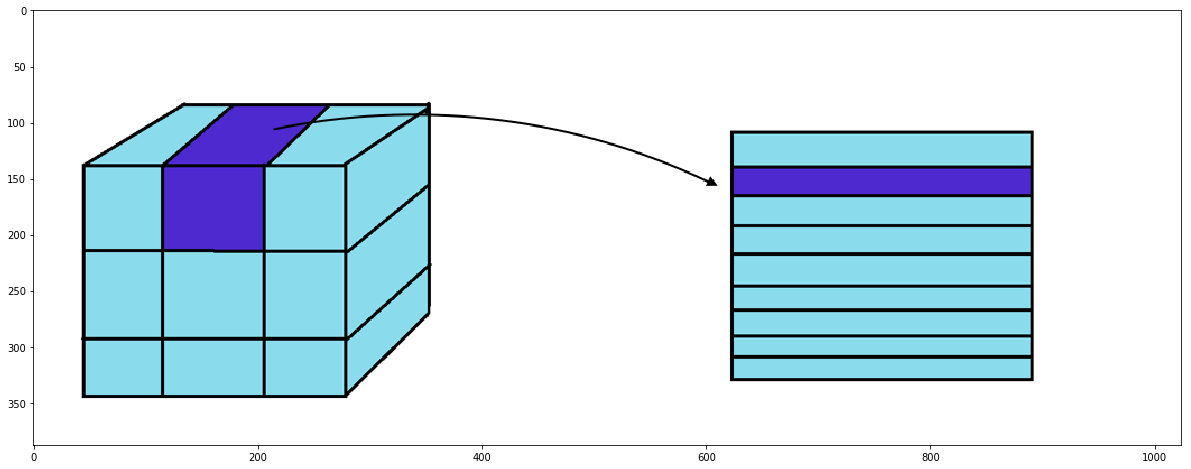

In [5]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork016.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

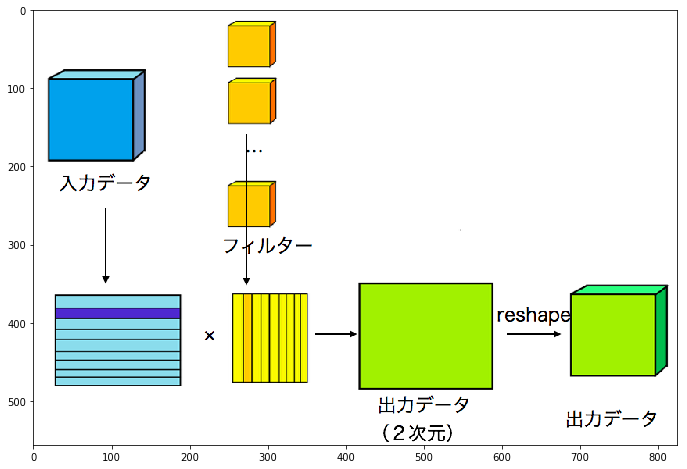

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork017.png')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [7]:
#----------------------------------------------------
# Parameters
#   input_data : (データ数,チャンネル,高さ,横幅)の4次元配列からなる入力データ
#   filter_h   : フィルターの高さ
#   filter_w   : フィルターの横幅
#   stride     : ストライド（歩）
#   pad        : パディング(詰める)
#   Returns
#   col        : 2次元配列 
#----------------------------------------------------
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [8]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [9]:
#(9, 75) →　x1の結果：バッチサイズ:1 channel:3 7x7
#(90, 75)→　x2の結果  バッチサイズ:10 channel:3 7x7
#

In [11]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None

        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        #reshape関数に-1を指定すると、多次元配列の辻褄が合うように要素数をまとめてくれる
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        #最後に出力サイズを適切な形状に整形する
        # reshapeは出力サイズを指定の形状を再構成
        # transposeは軸の順番を入れ替えている(transporse：転置)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        # 逆行列の計算自体は次の２行でしており、Affineの時と同じ、違うのは行列の次元の辻褄あわせだけ
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)

        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        #im2colと逆の処理
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

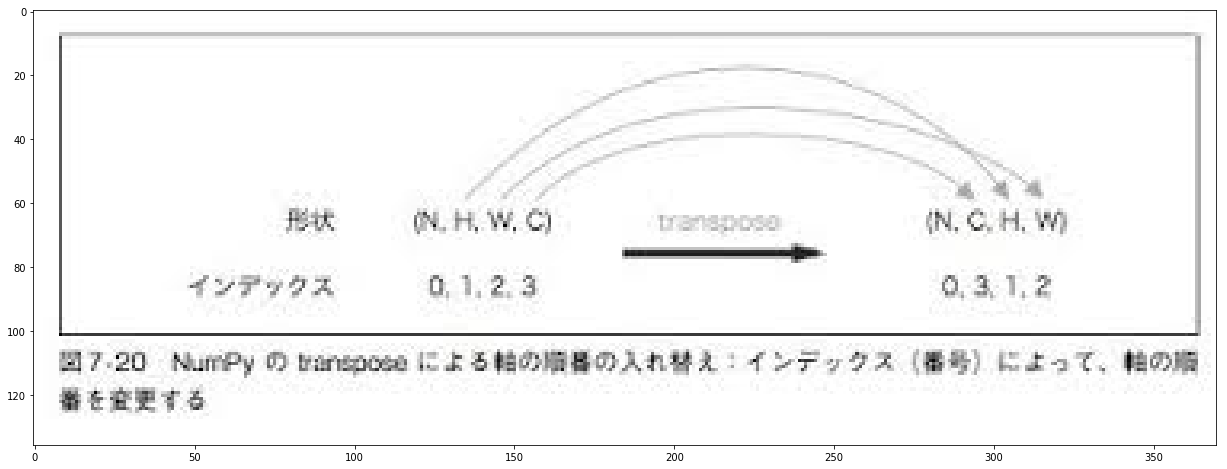

In [12]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork018.jpg')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [1]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)

        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        #flattenは構造を１次元配列に入れ直すこと
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 

        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

        return dx

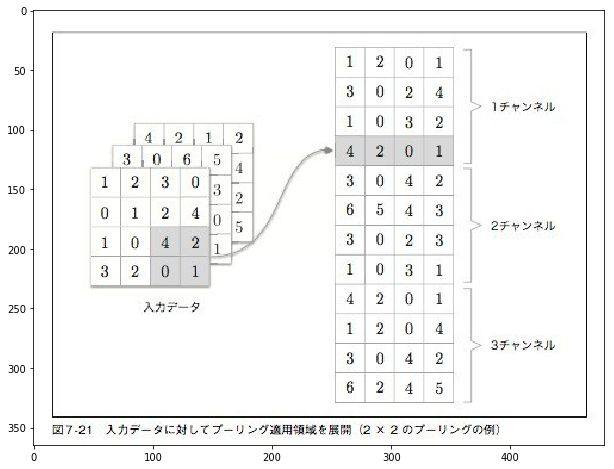

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork019.jpg')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

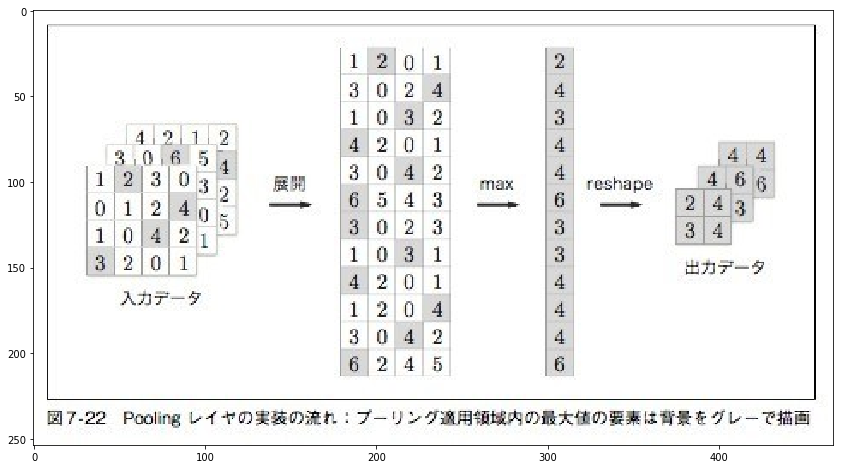

In [3]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork020.jpg')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

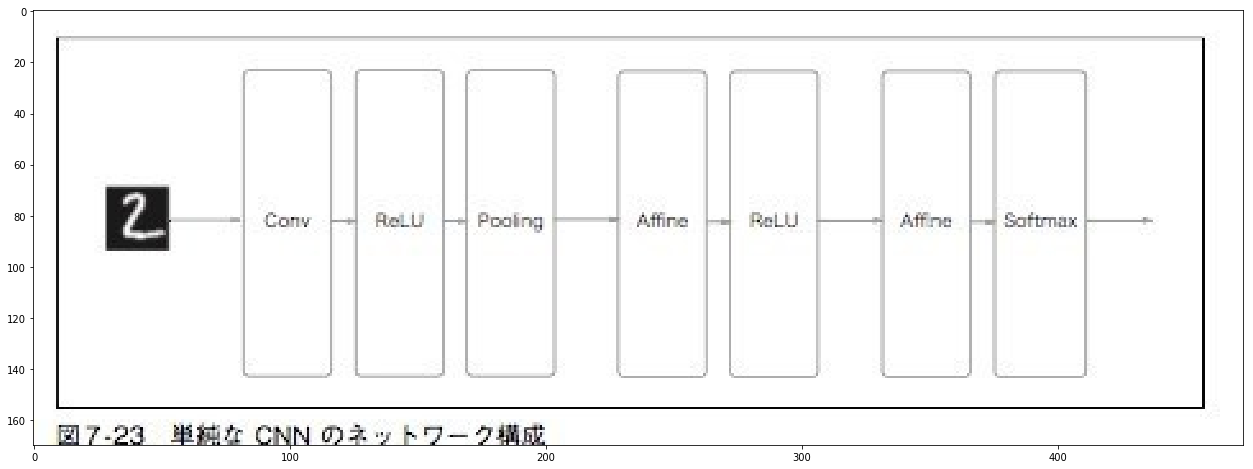

In [4]:
img = imread('D:/python/deeplearning/pycontent/dataset/ConvolutionNeuralNetwork021.jpg')
plt.figure(figsize=(50, 8)) # figureの縦横の大きさ
plt.imshow(img)

plt.show()

In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

# 単純なConvNet
# conv - relu - pool - affine - relu - affine - softmax
class SimpleConvNet:


    #----------------------------------------------------
    # Parameters
    #   input_size : 入力サイズ（MNISTの場合は784）
    #   hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    #   output_size : 出力サイズ（MNISTの場合は10）
    #   activation : 'relu' or 'sigmoid'
    #   weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
    #                    'relu'または'he'を指定した場合は「Heの初期値」を設定
    #                    'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    #----------------------------------------------------
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):

        # 重みの初期化、畳み込み層の出力サイズの計算
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    # 推論を行う
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # 損失関数を求める
    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [25]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [12]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient

# 単純なConvNet
# conv - relu - pool - affine - relu - affine - softmax
class SimpleConvNet:


    #----------------------------------------------------
    # Parameters
    #   input_size : 入力サイズ（MNISTの場合は784）
    #   hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    #   output_size : 出力サイズ（MNISTの場合は10）
    #   activation : 'relu' or 'sigmoid'
    #   weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
    #                    'relu'または'he'を指定した場合は「Heの初期値」を設定
    #                    'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    #----------------------------------------------------
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):

        # 重みの初期化、畳み込み層の出力サイズの計算
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    # 推論を行う
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # 損失関数を求める
    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [14]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
filter_show(network.params['W1'])

# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])

ModuleNotFoundError: No module named 'simple_convnet'

In [15]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親dirのfileをimportする為
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict
#from dataset.mnist import load_mnist
#from simple_convnet import SimpleConvNet
#from common.trainer import Trainer



MNIST_DATASET_DIR = os.path.dirname(os.path.abspath(__file__))
MNIST_SAVE_FILE = MNIST_DATASET_DIR + "/mnist.pkl"
MNIST_URL_BASE = 'http://yann.lecun.com/exdb/mnist/'
MNIST_GZ_FILES = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}
MNIST_IMG_SIZE = 784 # =28*28

def main():
    # データの読み込み
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

    # 処理に時間のかかる場合はデータを削減 
    #x_train, t_train = x_train[:5000], t_train[:5000]
    #x_test, t_test = x_test[:1000], t_test[:1000]

    max_epochs = 10
#    max_epochs = 20

    network = SimpleConvNet(input_dim=(1,28,28),
                            conv_param = {'filter_num': 30,
                                          'filter_size': 5,
                                          'pad': 0,
                                          'stride': 1},
                            hidden_size=100,
                            output_size=10,
                            weight_init_std=0.01)

    trainer = Trainer(network,
                      x_train, t_train,
                      x_test, t_test,
                      epochs=max_epochs,
                      mini_batch_size=100,
                      optimizer='Adam',
                      optimizer_param={'lr': 0.001},
                      evaluate_sample_num_per_epoch=1000)
    trainer.train()

    # パラメータの保存
    network.save_params("params.pkl")
    print("Saved Network Parameters!")

    # グラフの描画
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(max_epochs)
    plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
    plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.savefig( 'train_convnet_2.png' )

######################################################

class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

######################################################

class Trainer:
    """ニューラルネットの訓練を行うクラス
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimzer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))
######################################################

class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


######################################################
def smooth_curve(x):
    """損失関数のグラフを滑らかにするために用いる

    参考：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """データセットのシャッフルを行う

    Parameters
    ----------
    x : 訓練データ
    t : 教師データ

    Returns
    -------
    x, t : シャッフルを行った訓練データと教師データ
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

######################################################

class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


######################################################


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTの読み込み
    params
      normalize : 画像のピクセル値を0.0～1.0に正規化
      one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
      flatten : 画像を一次元配列に平にするかどうか
    
    returns
      (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(MNIST_SAVE_FILE):
        init_mnist()
        
    with open(MNIST_SAVE_FILE, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] =  _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), \
           (dataset['test_img'], dataset['test_label'])


def init_mnist():
    download_mnist()

    dataset = {}
    dataset['train_img'] =   load_mnist_img(  MNIST_GZ_FILES['train_img'])
    dataset['test_img'] =    load_mnist_img(  MNIST_GZ_FILES['test_img'])
    dataset['train_label'] = load_mnist_label(MNIST_GZ_FILES['train_label'])
    dataset['test_label'] =  load_mnist_label(MNIST_GZ_FILES['test_label'])

    with open(MNIST_SAVE_FILE, 'wb') as f:
        pickle.dump(dataset, f, -1)


def download_mnist():
    
    for file_name in MNIST_GZ_FILES.values():
        file_path = MNIST_DATASET_DIR + "/" + file_name

        if os.path.exists(file_path):
            continue
        print("download",
              MNIST_URL_BASE + file_name,
              "to", MNIST_DATASET_DIR)
        
        urllib.request.urlretrieve(MNIST_URL_BASE + file_name, file_path)


def load_mnist_label(file_name):
    file_path = MNIST_DATASET_DIR + "/" + file_name

    # rb = バイナリの読込み
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
        # 上記の「offset」の必要性は理解していません
    return labels

def load_mnist_img(file_name):
    file_path = MNIST_DATASET_DIR + "/" + file_name
    
    # rb = バイナリの読込み
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        # 上記の「offset」の必要性は理解していません

    # numpy.reshape(-1, ...)で、一次元配列化
    data = data.reshape(-1, MNIST_IMG_SIZE)
    return data


def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T


if __name__ == '__main__':
    main()

NameError: name '__file__' is not defined

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親dirのfileをimportする為
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import OrderedDict
#from dataset.mnist import load_mnist
#from simple_convnet import SimpleConvNet
#from common.trainer import Trainer



MNIST_DATASET_DIR = os.path.dirname(os.path.abspath(__file__))
MNIST_SAVE_FILE = MNIST_DATASET_DIR + "/mnist.pkl"
MNIST_URL_BASE = 'http://yann.lecun.com/exdb/mnist/'
MNIST_GZ_FILES = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}
MNIST_IMG_SIZE = 784 # =28*28

def main():
    # データの読み込み
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

    # 処理に時間のかかる場合はデータを削減 
    #x_train, t_train = x_train[:5000], t_train[:5000]
    #x_test, t_test = x_test[:1000], t_test[:1000]

    max_epochs = 10
#    max_epochs = 20

    network = SimpleConvNet(input_dim=(1,28,28),
                            conv_param = {'filter_num': 30,
                                          'filter_size': 5,
                                          'pad': 0,
                                          'stride': 1},
                            hidden_size=100,
                            output_size=10,
                            weight_init_std=0.01)

    trainer = Trainer(network,
                      x_train, t_train,
                      x_test, t_test,
                      epochs=max_epochs,
                      mini_batch_size=100,
                      optimizer='Adam',
                      optimizer_param={'lr': 0.001},
                      evaluate_sample_num_per_epoch=1000)
    trainer.train()

    # パラメータの保存
    network.save_params("params.pkl")
    print("Saved Network Parameters!")

    # グラフの描画
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(max_epochs)
    plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
    plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.savefig( 'train_convnet_2.png' )

######################################################

class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

######################################################

class Trainer:
    """ニューラルネットの訓練を行うクラス
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimzer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))
######################################################

class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]


class Nesterov:

    """Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]


class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


######################################################
def smooth_curve(x):
    """損失関数のグラフを滑らかにするために用いる

    参考：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]


def shuffle_dataset(x, t):
    """データセットのシャッフルを行う

    Parameters
    ----------
    x : 訓練データ
    t : 教師データ

    Returns
    -------
    x, t : シャッフルを行った訓練データと教師データ
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

def conv_output_size(input_size, filter_size, stride=1, pad=0):
    return (input_size + 2*pad - filter_size) / stride + 1


def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col


def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad

    Returns
    -------

    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

######################################################

class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


######################################################


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTの読み込み
    params
      normalize : 画像のピクセル値を0.0～1.0に正規化
      one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
      flatten : 画像を一次元配列に平にするかどうか
    
    returns
      (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(MNIST_SAVE_FILE):
        init_mnist()
        
    with open(MNIST_SAVE_FILE, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] =  _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), \
           (dataset['test_img'], dataset['test_label'])


def init_mnist():
    download_mnist()

    dataset = {}
    dataset['train_img'] =   load_mnist_img(  MNIST_GZ_FILES['train_img'])
    dataset['test_img'] =    load_mnist_img(  MNIST_GZ_FILES['test_img'])
    dataset['train_label'] = load_mnist_label(MNIST_GZ_FILES['train_label'])
    dataset['test_label'] =  load_mnist_label(MNIST_GZ_FILES['test_label'])

    with open(MNIST_SAVE_FILE, 'wb') as f:
        pickle.dump(dataset, f, -1)


def download_mnist():
    
    for file_name in MNIST_GZ_FILES.values():
        file_path = MNIST_DATASET_DIR + "/" + file_name

        if os.path.exists(file_path):
            continue
        print("download",
              MNIST_URL_BASE + file_name,
              "to", MNIST_DATASET_DIR)
        
        urllib.request.urlretrieve(MNIST_URL_BASE + file_name, file_path)


def load_mnist_label(file_name):
    file_path = MNIST_DATASET_DIR + "/" + file_name

    # rb = バイナリの読込み
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
        # 上記の「offset」の必要性は理解していません
    return labels

def load_mnist_img(file_name):
    file_path = MNIST_DATASET_DIR + "/" + file_name
    
    # rb = バイナリの読込み
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        # 上記の「offset」の必要性は理解していません

    # numpy.reshape(-1, ...)で、一次元配列化
    data = data.reshape(-1, MNIST_IMG_SIZE)
    return data


def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T


if __name__ == '__main__':
    main()

NameError: name '__file__' is not defined

In [18]:
#----------------------------------------------------
# Parameters
#   input_data : (データ数,チャンネル,高さ,横幅)の4次元配列からなる入力データ
#   filter_h   : フィルターの高さ
#   filter_w   : フィルターの横幅
#   stride     : ストライド（歩）
#   pad        : パディング(詰める)
#   Returns
#   col        : 2次元配列 
#----------------------------------------------------
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):

    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [19]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1, 3, 7, 7)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)\

(9, 75)
(90, 75)


In [21]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None

        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        #reshape関数に-1を指定すると、多次元配列の辻褄が合うように要素数をまとめてくれる
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        #最後に出力サイズを適切な形状に整形する
        # reshapeは出力サイズを指定の形状を再構成
        # transposeは軸の順番を入れ替えている(transporse：転置)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        # 逆行列の計算自体は次の２行でしており、Affineの時と同じ、違うのは行列の次元の辻褄あわせだけ
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)

        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        #im2colと逆の処理
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

In [22]:
# coding: utf-8
import numpy as np
from common.functions import *
from common.util import im2col, col2im


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元  

        # テスト時に使用する平均と分散
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:2.298902899805252
=== epoch:1, train acc:0.322, test acc:0.347 ===
train loss:2.2961298111512227
train loss:2.2906457145133094
train loss:2.2846594031693352
train loss:2.270942747633986
train loss:2.260183289088902
train loss:2.241407087015872
train loss:2.2126842676131098
train loss:2.185728138538675
train loss:2.18112304331941
train loss:2.1414349604293887
train loss:2.074618730903276
train loss:2.0145599926310926
train loss:2.0001310039805924
train loss:1.8967858929544403
train loss:1.7658646570521181
train loss:1.7617940328458133
train loss:1.6615483148284431
train loss:1.6284301522605793
train loss:1.5611155030483455
train loss:1.5925335403541325
train loss:1.3712820255869185
train loss:1.2519180372501808
train loss:1.1864952952239909
train loss:1.2071197276545345
train loss:1.1139315841632125
train loss:1.0410997432897793
train loss:0.8704925373248834
train loss:0.8166394096975093
train loss:0.9788594769692849
train loss:0.8582979793117036
train loss:0.7749679925216099

train loss:0.20904898477964892
train loss:0.33731206901804733
train loss:0.24248597684661743
train loss:0.2449635941115143
train loss:0.18764145901787427
train loss:0.2877891302225143
train loss:0.11133338808228642
train loss:0.16416152018701438
train loss:0.20379405948423673
train loss:0.27175310830297134
train loss:0.3401533826834764
train loss:0.1752141768848192
train loss:0.226209279522257
train loss:0.17499625422919382
train loss:0.21807934407639182
train loss:0.3218283279271287
train loss:0.2774037961160565
train loss:0.22510681800858243
train loss:0.2217535275368637
train loss:0.19339266246273176
train loss:0.11551072120389083
train loss:0.18042270515496675
train loss:0.2141426407537818
train loss:0.16906127572803764
train loss:0.26882454511903936
train loss:0.3132293590098704
train loss:0.20566988294067468
train loss:0.20319817712893484
train loss:0.20287638638503377
train loss:0.29408202231489633
train loss:0.21226445585182552
train loss:0.13584463164904365
train loss:0.175763

train loss:0.10683595377258857
train loss:0.18732126022391818
train loss:0.11798937147261075
train loss:0.127669756916213
train loss:0.15766965061383106
train loss:0.10885628345083256
train loss:0.07724472759720873
train loss:0.17802688969910108
train loss:0.13525580448308075
train loss:0.10948365334066298
train loss:0.072543017572397
train loss:0.0906152102979722
train loss:0.1838709360229134
train loss:0.11581534387736296
train loss:0.106905555108871
train loss:0.10651774431700325
train loss:0.1013764035578328
train loss:0.10837589731313198
train loss:0.1899466898015243
train loss:0.11654921857127257
train loss:0.10726000910917977
train loss:0.09738669103231005
train loss:0.03659810944830828
train loss:0.0426634339806494
train loss:0.13103054076156093
train loss:0.09170918968165635
train loss:0.10175402468527989
train loss:0.09991931140927893
train loss:0.11075936814138719
train loss:0.08249683238113042
train loss:0.22718938269166755
train loss:0.1226186423741553
train loss:0.0682998

train loss:0.1061110182975154
train loss:0.03642886030862521
train loss:0.10465479229299554
train loss:0.037458029228767994
train loss:0.12224208688185177
train loss:0.08297001943334555
train loss:0.06544923222852482
train loss:0.04243247923905011
train loss:0.09353626449676826
train loss:0.0989050248893271
train loss:0.0654577025186674
train loss:0.10360022703190591
train loss:0.045986120171773
train loss:0.04226486937464492
train loss:0.07176202528227064
train loss:0.14162318574188837
train loss:0.169792631388435
train loss:0.040865236293203
train loss:0.07988909126532776
train loss:0.06826193825050873
train loss:0.11323656632742253
train loss:0.073173675371596
train loss:0.0836928412983776
train loss:0.12722832979681
train loss:0.029051107838553896
train loss:0.13630818819689167
train loss:0.050085406751816955
train loss:0.06410646802217115
train loss:0.0634163970333332
train loss:0.03714748517286831
train loss:0.1247400966128713
train loss:0.12502891118464127
train loss:0.084093608

train loss:0.12875363502786488
train loss:0.06487584317565279
train loss:0.046353495283812975
train loss:0.08543290676235066
train loss:0.05706543603720295
train loss:0.03343405141933037
train loss:0.20785224604573208
train loss:0.028458492518230166
train loss:0.05689023369135532
train loss:0.04793577108638627
train loss:0.03455854401369329
train loss:0.020499626378735192
train loss:0.04673613661765568
train loss:0.06693345227020112
train loss:0.09975575688679486
train loss:0.06789849628484643
train loss:0.052174300257922156
train loss:0.02902317184967733
train loss:0.06490604829373027
train loss:0.05310456026092585
train loss:0.0598628738698156
train loss:0.0497442217765662
train loss:0.02040117453857627
train loss:0.06752419348723078
train loss:0.14393068943913218
train loss:0.03977526165289555
train loss:0.04310666033183507
train loss:0.11198917791287519
train loss:0.04931814219742308
train loss:0.055268097298087876
train loss:0.05914132873734388
train loss:0.06325802636242321
train

train loss:0.11528149601390689
train loss:0.024752455892905756
train loss:0.029521412176308756
train loss:0.02139533490574673
train loss:0.02934738083298832
train loss:0.053509182212087884
train loss:0.08600908129548802
train loss:0.06709232528156553
train loss:0.03582581246622413
train loss:0.0466587910827054
train loss:0.12046216596675423
train loss:0.09599491276070733
train loss:0.058495382718166636
train loss:0.04591058424729763
train loss:0.029698239023012912
train loss:0.06234863191229728
train loss:0.05855904136575165
train loss:0.06764775879881013
train loss:0.14951588086955903
train loss:0.05721810826198385
train loss:0.07026861248283703
train loss:0.020865969486105262
train loss:0.1522412888853084
train loss:0.06534868700896271
train loss:0.03241648173952698
train loss:0.07540540473497387
train loss:0.024480666316929547
train loss:0.10666432466466437
train loss:0.03493210287780553
train loss:0.013111786767109031
train loss:0.08557977500452837
train loss:0.038796028798921564
t

train loss:0.03014102034150008
train loss:0.026687882543710635
train loss:0.05061540362222797
train loss:0.05233979070995396
train loss:0.08460015272107689
train loss:0.11649082722251781
train loss:0.11259206033026219
train loss:0.011019411657719795
train loss:0.03299947560463956
train loss:0.055598240644481225
train loss:0.06183455118931418
train loss:0.05179203737906838
train loss:0.14512252454597077
train loss:0.032377076376607396
train loss:0.05876215402539167
train loss:0.021828037300686467
train loss:0.08474931418733118
train loss:0.04907710657593543
train loss:0.02376985061415718
train loss:0.03430519857286995
train loss:0.0373227736578498
train loss:0.018848473314316338
train loss:0.03827021444786423
train loss:0.02041780431080913
train loss:0.04083026962721417
train loss:0.04742592886238903
train loss:0.07992528088635535
train loss:0.03982711115941237
train loss:0.019316544925789672
train loss:0.01158939848813394
train loss:0.0707659699254054
train loss:0.06074927036745757
tra

train loss:0.020362919956013293
train loss:0.04253740771194188
train loss:0.07803345628138897
train loss:0.016266769670231794
train loss:0.04557142916583313
train loss:0.05287284556540822
train loss:0.01775900602259217
train loss:0.06265890282543206
train loss:0.02298161135257999
train loss:0.019075407762144326
train loss:0.014199506599220521
train loss:0.09985476604702231
train loss:0.06111967114046916
train loss:0.04462828995241139
train loss:0.06054914899387821
train loss:0.08032622318627242
train loss:0.03851270563161779
train loss:0.007883500283399025
train loss:0.05455447515178068
train loss:0.02699248265542453
train loss:0.11390598878177469
train loss:0.01771614320891897
train loss:0.022732140440305602
train loss:0.04079409225307835
train loss:0.05440503900420472
train loss:0.07890169758301767
train loss:0.03891968504028934
train loss:0.0538952077432164
train loss:0.0740334393726549
train loss:0.01522295449183296
train loss:0.01926414521839942
train loss:0.03542794667310555
trai

train loss:0.04829210649021747
train loss:0.016991931398225434
train loss:0.03738302169363882
train loss:0.1389157900830513
train loss:0.026003539296426518
train loss:0.05575947168992169
train loss:0.017855355262016894
train loss:0.019106301357900594
train loss:0.06928542485411869
train loss:0.08983287500285872
train loss:0.017999905016992807
train loss:0.03735661465460688
train loss:0.022147352066397792
train loss:0.018419914533666083
train loss:0.06410172612980701
train loss:0.07170266019662792
train loss:0.017853299459665364
train loss:0.020596684436110766
train loss:0.12500767144611832
train loss:0.03064887134822298
train loss:0.007444094732760967
train loss:0.07450915324951998
train loss:0.06293280387904017
train loss:0.030409870254110613
train loss:0.06000746677905362
train loss:0.061417025028006965
train loss:0.029899095926394042
train loss:0.08470518357043694
train loss:0.10531485025627646
train loss:0.02662707384139878
train loss:0.00826931451812372
train loss:0.00541064868777

train loss:0.0626555096720304
train loss:0.013427183181037295
train loss:0.014847308315023731
train loss:0.02823785587057308
train loss:0.009858584872487981
train loss:0.044174557052071205
train loss:0.09876284104297214
train loss:0.02259905284059394
train loss:0.0019056554166964335
train loss:0.012351097618486859
train loss:0.10064387123969176
train loss:0.03605908865421864
train loss:0.10520113075820983
train loss:0.005790111426981549
train loss:0.007841388346977136
train loss:0.06465989847927009
train loss:0.021320090524301314
train loss:0.04890083375462357
train loss:0.032379686437054106
train loss:0.1703367063660599
train loss:0.09381668812229198
train loss:0.02682634398541878
train loss:0.023555817373078464
train loss:0.009520545636538069
train loss:0.027596235604667965
train loss:0.04816315090644366
train loss:0.01741918945302589
=== epoch:5, train acc:0.985, test acc:0.979 ===
train loss:0.035160476785964116
train loss:0.05991504886977828
train loss:0.04516808254846939
train lo

train loss:0.004122257508866249
train loss:0.05030467199244703
train loss:0.008599048072923913
train loss:0.010658249401631213
train loss:0.013366251761912154
train loss:0.028069097506578423
train loss:0.01684211445109424
train loss:0.029704266449142574
train loss:0.008565094320018958
train loss:0.014941005639862425
train loss:0.009999830534868605
train loss:0.013692455816676047
train loss:0.05876612770292691
train loss:0.04821747704124027
train loss:0.02836813868258473
train loss:0.013053849363398649
train loss:0.014668139943106815
train loss:0.09526053122964757
train loss:0.033869201508250506
train loss:0.0067674421189692115
train loss:0.03930590601575176
train loss:0.01136680005470131
train loss:0.04221161836409552
train loss:0.028478745576289027
train loss:0.04047137341683097
train loss:0.06370203251979216
train loss:0.008242561468609197
train loss:0.02131913359688961
train loss:0.05822285404108904
train loss:0.020279246074101476
train loss:0.024143964017486943
train loss:0.0098299

train loss:0.06993272622624888
train loss:0.017558801918242495
train loss:0.03581525808085453
train loss:0.04481512720363409
train loss:0.026418496004818458
train loss:0.005955136746171763
train loss:0.01893600045169048
train loss:0.004634840322240762
train loss:0.05920768587697446
train loss:0.04099070891496528
train loss:0.006727328150617805
train loss:0.010619110249579096
train loss:0.034385621498339715
train loss:0.04784836408149629
train loss:0.07776222795599826
train loss:0.03899347428993004
train loss:0.01652183605113804
train loss:0.01334552960882066
train loss:0.031944905599502624
train loss:0.03518022208781216
train loss:0.02556911610923097
train loss:0.010947140422125775
train loss:0.030583819690921343
train loss:0.045247055894970856
train loss:0.07195757067577513
train loss:0.020390861365254382
train loss:0.07686234003363988
train loss:0.014930037269767993
train loss:0.00856452082695771
train loss:0.06468755198755011
train loss:0.012279333287279794
train loss:0.048072307600

train loss:0.02526643275401309
train loss:0.004416037829853166
train loss:0.06297407785391218
train loss:0.01409016870801188
train loss:0.004480256066395055
train loss:0.00887371073164452
train loss:0.022676355971374174
train loss:0.020375630565899697
train loss:0.007210808188964679
train loss:0.020719306946505544
train loss:0.010670272954120643
train loss:0.007729114059344456
train loss:0.007423251376077259
train loss:0.0059547962286948955
train loss:0.015475562665597332
train loss:0.007224343505065469
train loss:0.009084329640175031
train loss:0.03964231888778957
train loss:0.04348820855169556
train loss:0.011302941629922847
train loss:0.012559066769570495
train loss:0.00506364131847419
train loss:0.003806108101188399
train loss:0.054294525581095446
train loss:0.04298266544823149
train loss:0.07522908146719047
train loss:0.01435811987096224
train loss:0.020980725898508867
train loss:0.02124556189214296
train loss:0.06395617875900966
train loss:0.007343889193337193
train loss:0.123660

train loss:0.023630505991342705
train loss:0.009370485780818805
train loss:0.02549570694340202
train loss:0.015814699887333316
train loss:0.018263091184433877
train loss:0.016219972207897063
train loss:0.03689335893230014
train loss:0.06534824204896156
train loss:0.008543239155212094
train loss:0.02966421680787363
train loss:0.05907351507878908
train loss:0.032414970673298404
train loss:0.0652636583377
train loss:0.017008847471202612
train loss:0.0078244457133606
train loss:0.03127863629383833
train loss:0.018330250402386478
train loss:0.03082525250281509
train loss:0.10761918839910235
train loss:0.019871293260746162
train loss:0.03859566521566432
train loss:0.025619847186850037
train loss:0.008465454281296091
train loss:0.04974689399232154
train loss:0.024103589175331935
train loss:0.02528582645657434
train loss:0.02097647686095659
train loss:0.02964544274502828
train loss:0.012100865912458427
train loss:0.03189800919683631
train loss:0.003642180006562075
train loss:0.0136572333680261

train loss:0.016361270515652785
train loss:0.017404863210726488
train loss:0.047746823172674036
train loss:0.01478471941643109
train loss:0.027846084654041734
train loss:0.009673869240240248
train loss:0.023308065072949614
train loss:0.013735939405901015
train loss:0.02061761666201768
train loss:0.02391653241470364
train loss:0.038035537218417195
train loss:0.042441853428129915
train loss:0.003864023470065183
train loss:0.032355104547025754
train loss:0.0687507942024129
train loss:0.02715144693197669
train loss:0.008726113153970306
train loss:0.043437799367001616
train loss:0.030465238414919882
train loss:0.03983375210175047
train loss:0.01549923172140235
train loss:0.003921626391693714
train loss:0.003393303167259642
train loss:0.04740920703814111
train loss:0.033186014114776834
train loss:0.016123284364286353
train loss:0.023292010618372785
train loss:0.013524590945889354
train loss:0.016138275483070855
train loss:0.005155708531694061
train loss:0.018885851452843782
train loss:0.0019

train loss:0.01979721595763474
train loss:0.014850901165408891
train loss:0.012091222669553727
train loss:0.019028704950979188
train loss:0.004645013095456988
train loss:0.008970226062137026
train loss:0.028078929509439653
train loss:0.0027625722296972
train loss:0.015595302744545656
train loss:0.03272079816473266
train loss:0.0093525897772071
train loss:0.01904459198612511
train loss:0.010664323508418751
train loss:0.012276553889597901
train loss:0.008001877564550803
train loss:0.017280930472059065
train loss:0.015384913603926312
train loss:0.02610567117131562
train loss:0.007718862881932473
train loss:0.01915979446144749
train loss:0.032089067654093625
train loss:0.020387591643755434
train loss:0.02068008525318009
train loss:0.02722250887189265
train loss:0.006969732393028105
train loss:0.026193758635433675
train loss:0.014799995451994143
train loss:0.011981182202975858
train loss:0.030193853874781844
train loss:0.005555369749655214
train loss:0.006615173120489759
train loss:0.029017

train loss:0.003553775692788536
train loss:0.0358499797935035
train loss:0.018531817986233042
train loss:0.013254791861091353
train loss:0.0021348722709756693
train loss:0.0021731159110978913
train loss:0.006626886185781024
train loss:0.0010391326011837398
train loss:0.010882872900217767
train loss:0.006043050602720783
train loss:0.0025554593010271376
train loss:0.002842523713450439
train loss:0.01885994678569668
train loss:0.025892172201591027
train loss:0.010429780893818397
=== epoch:8, train acc:0.993, test acc:0.989 ===
train loss:0.0068497083325944515
train loss:0.01606155349864754
train loss:0.005298106916793534
train loss:0.006645348354211269
train loss:0.026531258924301193
train loss:0.00730588677752337
train loss:0.0028842784221006874
train loss:0.005222883538073616
train loss:0.0034257076548453724
train loss:0.004432376631760725
train loss:0.010573498256020783
train loss:0.008810338352259521
train loss:0.012092330480374837
train loss:0.010140839065512832
train loss:0.04468651

train loss:0.0032611529011493012
train loss:0.004159119251000078
train loss:0.028194931418238575
train loss:0.008161091232322044
train loss:0.011662895229872563
train loss:0.0072932395778756
train loss:0.008824160675922297
train loss:0.00926474198818415
train loss:0.0067578041220524784
train loss:0.00643647497075968
train loss:0.008051594853421894
train loss:0.02326400829888657
train loss:0.0016343619608627552
train loss:0.003191302045733052
train loss:0.0035350129517403277
train loss:0.002841854043952643
train loss:0.03114230587925889
train loss:0.04302937799112398
train loss:0.011747421649796912
train loss:0.0047263766563402495
train loss:0.004278874256592612
train loss:0.0019694890741434033
train loss:0.011358175639475547
train loss:0.00869291145949739
train loss:0.031128110820578887
train loss:0.0038237020089393215
train loss:0.04130384014514216
train loss:0.002298423225364098
train loss:0.010838943599617538
train loss:0.008477781989244251
train loss:0.006594596327337703
train loss

train loss:0.009758101954550718
train loss:0.006242543594987826
train loss:0.026822009620606418
train loss:0.017457263402019668
train loss:0.0016922974671798674
train loss:0.015063386204439795
train loss:0.011565516306681331
train loss:0.0076973903084192686
train loss:0.010126181897764113
train loss:0.027693679200758364
train loss:0.05429177637942123
train loss:0.028651546496624016
train loss:0.0027299898942400097
train loss:0.015900322558951505
train loss:0.012640378024442695
train loss:0.010473660003532148
train loss:0.01705789678759517
train loss:0.005601421793991102
train loss:0.045630092445594087
train loss:0.01433105348703327
train loss:0.00917607736705125
train loss:0.005186310666220272
train loss:0.004311492455339938
train loss:0.01136544696663177
train loss:0.010751292220435162
train loss:0.006414710235543524
train loss:0.01853381676022132
train loss:0.022710565794428678
train loss:0.0036630928094649614
train loss:0.01307935623380034
train loss:0.02641230572240032
train loss:0

train loss:0.005623176415184632
train loss:0.003447439289610072
train loss:0.0015073148762132017
train loss:0.011642218868581144
train loss:0.0061059551362623275
train loss:0.003200531416328183
train loss:0.0008119313802365044
train loss:0.025082004177795582
train loss:0.025255127871150463
train loss:0.0027838518858314086
train loss:0.0026779577772864023
train loss:0.020861673344892247
train loss:0.022323506376350135
train loss:0.008894462909296926
train loss:0.024538522069618054
train loss:0.00624684196400621
train loss:0.020599703854664874
train loss:0.010968079760223784
train loss:0.014016127918210648
train loss:0.01888553892716896
train loss:0.0067351676798338735
train loss:0.00935088162107774
train loss:0.014013335422727086
train loss:0.016308758574008434
train loss:0.013293129833247694
train loss:0.0015555862712696956
train loss:0.0064945723572410515
train loss:0.011761864253564736
train loss:0.0015936824570770224
train loss:0.009284420704649016
train loss:0.006177813374891645
tr

train loss:0.004973739770101205
train loss:0.02057877103178007
train loss:0.023634371418610255
train loss:0.029779510175457116
train loss:0.006910487163583274
train loss:0.004464908829694738
train loss:0.003500785896810395
train loss:0.010848190708618715
train loss:0.006252376352107516
train loss:0.004846333877669272
train loss:0.04186334589372807
train loss:0.01817689071647831
train loss:0.012602723672047672
train loss:0.0007529712496978088
train loss:0.00940690653456954
train loss:0.02145411802249196
train loss:0.0028884938429167535
train loss:0.005440928425065616
train loss:0.023288442188147757
train loss:0.005420087149702566
train loss:0.01638181816199118
train loss:0.02307981199609593
train loss:0.0017405360768764603
train loss:0.005492173526956284
train loss:0.003997894308258376
train loss:0.0054506590113391
train loss:0.0021081983676465503
train loss:0.052122603625963576
train loss:0.01669234525505934
train loss:0.005106049443658726
train loss:0.015843308413894742
train loss:0.0

train loss:0.011143681768902469
train loss:0.0026335088885584353
train loss:0.0015346622477938785
train loss:0.004849481480535702
train loss:0.0067696420402089345
train loss:0.0012379143185772803
train loss:0.01421625439547286
train loss:0.010396415130339206
train loss:0.01034658143258798
train loss:0.002606961804644175
train loss:0.0022063889337038795
train loss:0.008502944393892438
train loss:0.0013826714504597737
train loss:0.023931588389326176
train loss:0.003652535561199556
train loss:0.015659245401515563
train loss:0.005061326985058878
train loss:0.020956462400449172
train loss:0.008868522787742486
train loss:0.003814959417981002
train loss:0.008626083986064334
train loss:0.0021534560952535696
train loss:0.002914985809362354
train loss:0.0011753764315458937
train loss:0.002944539895515095
train loss:0.05009339690028602
train loss:0.005964601874185311
train loss:0.009018950976942532
train loss:0.002071894823698798
train loss:0.00868513679609933
train loss:0.002870581583167077
trai

train loss:0.03217880999523232
train loss:0.007062444724215487
train loss:0.003366724399881851
train loss:0.008080567849572576
train loss:0.022278692136090506
train loss:0.0036057484969553373
train loss:0.05280784693689074
train loss:0.005754773305865508
train loss:0.002790277112080818
train loss:0.003747625833348534
train loss:0.0031627802029597246
train loss:0.006049153111469843
train loss:0.005582218942411862
train loss:0.006198944334810396
train loss:0.0033755363094970193
train loss:0.012784770847901113
train loss:0.02057182497161569
train loss:0.039233992024219184
train loss:0.002968638810410393
train loss:0.04439888621872208
train loss:0.0202883882268144
train loss:0.0071362869426653715
train loss:0.010175699099822017
train loss:0.00557335620834704
train loss:0.011337214898375279
train loss:0.0057227882499372275
train loss:0.029459968770005986
train loss:0.022584370814783834
train loss:0.05244570524616367
train loss:0.04666100072398299
train loss:0.005609430362188183
train loss:0

train loss:0.004747440844300208
train loss:0.008318982565699745
train loss:0.007004259397861285
train loss:0.012680072056547113
train loss:0.0030013035438719955
train loss:0.007980400456954308
train loss:0.004490211121473285
train loss:0.001985707102084764
train loss:0.0019597206218131095
train loss:0.007826882007822613
train loss:0.003889336899890596
train loss:0.02333705036249796
train loss:0.00802005058952865
train loss:0.019314915481582765
train loss:0.005271759936502542
train loss:0.004814133495094073
train loss:0.0034048814408676026
train loss:0.022456798060396597
train loss:0.0023191029875742793
train loss:0.006249510076654055
train loss:0.002583168525965651
train loss:0.021009562001429342
train loss:0.002264743018460895
train loss:0.0065759017511678
train loss:0.03389550814591706
=== epoch:11, train acc:0.997, test acc:0.987 ===
train loss:0.005733722568598519
train loss:0.016042045690895543
train loss:0.005325319853560427
train loss:0.009617463969221005
train loss:0.0213873941

In [24]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
filter_show(network.params['W1'])

# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])